![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/04_Hyperparameter%20Tuning%20with%20Cross%20Validation/04_cross-validation_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
- The aim is to predict weather a **person** (rows) `earned>50k` a year or not
- Based on their **social-demographic features** (columns)

PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [6]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df_salary = pd.read_csv(url, header=None, na_values=' ?')
df_salary.rename(columns={14: 'target'}, inplace=True)
df_salary.columns = [str(i) for i in df_salary.columns]
df_salary.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocess the Data

In [7]:
pd.get_dummies(df_salary)

,0,2,4,10,11,12,1_ Federal-gov,1_ Local-gov,1_ Never-worked,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 10th,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Divorced,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Adm-clerical,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Husband,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Amer-Indian-Eskimo,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Female,9_ Male,13_ Cambodia,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ <=50K,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32559,22,201490,9,0,0,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32560,52,287927,9,15024,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [8]:
df_salary = pd.get_dummies(df_salary)

## Feature Selection

In [10]:
y = df_salary.iloc[:, -1]

In [12]:
X = df_salary.iloc[:, :-2]

## `train_test_split()` the Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

## `DecisionTreeClassifier()` with Default Hyperparameters

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model_dt = DecisionTreeClassifier()

In [19]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Accuracy

#### > In `train` data

In [20]:
model_dt.score(X_train, y_train)

1.0

#### > In `test` data

In [21]:
model_dt.score(X_test, y_test)

0.8122091941187418

### Model Visualization

In [22]:
from sklearn.tree import plot_tree

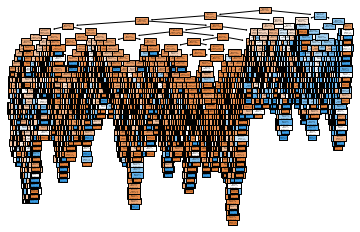

In [21]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

## Interpretation

- [ ] Why the difference on accuracy is so much?

## `DecisionTreeClassifier()` with Custom Hyperparameters

In [25]:
model_dt = DecisionTreeClassifier()

In [26]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### 1st Configuration

#### Accuracy

##### > In `train` data

In [27]:
model_dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=150)

In [28]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=150)

In [29]:
model_dt.score(X_train, y_train)

0.8279624111849645

##### > In `test` data

In [30]:
model_dt.score(X_test, y_test)

0.8287734971152056

#### Model Visualization

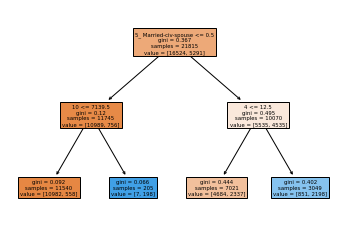

In [31]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 2nd Configuration

#### Accuracy

##### > In `train` data

In [32]:
model_dt = DecisionTreeClassifier(max_depth=3)

In [33]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
model_dt.score(X_train, y_train)

0.843639697455879

##### > In `test` data

In [35]:
model_dt.score(X_test, y_test)

0.8444072212916434

#### Model Visualization

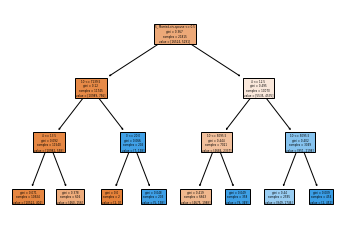

In [36]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 3rd Configuration

#### Accuracy

##### > In `train` data

In [37]:
model_dt = DecisionTreeClassifier(max_depth=4)

In [38]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
model_dt.score(X_train, y_train)

0.8488196195278478

##### > In `test` data

In [40]:
model_dt.score(X_test, y_test)

0.8491531732737763

#### Model Visualization

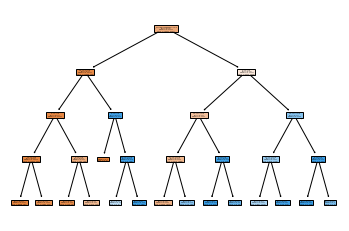

In [41]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 4th Configuration

#### Accuracy

##### > In `train` data

In [42]:
model_dt = DecisionTreeClassifier(min_samples_leaf=100)

In [43]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [44]:
model_dt.score(X_train, y_train)

0.8591336236534495

##### > In `test` data

In [45]:
model_dt.score(X_test, y_test)

0.8598548297040759

#### Model Visualization

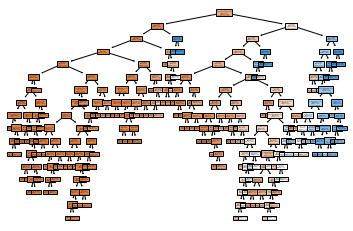

In [46]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 5th Configuration

#### Accuracy

##### > In `train` data

In [47]:
model_dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [48]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [49]:
model_dt.score(X_train, y_train)

0.8529910611964244

##### > In `test` data

In [50]:
model_dt.score(X_test, y_test)

0.8550158198399405

#### Model Visualization

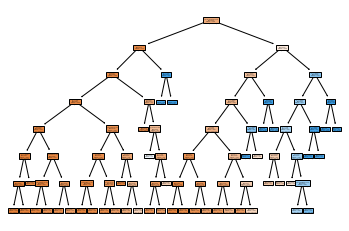

In [51]:
plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

## `GridSearchCV()` to find Best Hyperparameters

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
model_dt = DecisionTreeClassifier()

In [54]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [55]:
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600],
    'criterion': ['gini', 'entropy']
}

In [56]:
cv = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, verbose=1)

In [58]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=1)

In [63]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

In [64]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [65]:
cv.score(X_test, y_test)

0.8578075563000186

In [66]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1)

In [67]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [68]:
model_dt.score(X_test, y_test)

0.8576214405360134

## Other Models

### Support Vector Machines `SVC()`

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [71]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
X_norm = pd.DataFrame(scaler.fit_transform(X))

In [75]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X_norm, y, test_size=0.33, random_state=42)

In [76]:
from sklearn.svm import SVC

In [77]:
sv = SVC()

In [78]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [79]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'kernel']
}

In [80]:
cv_svc = GridSearchCV(estimator=sv, param_grid=param_grid, verbose=2)

In [81]:
cv_svc.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  15.1s
[CV] END ...............................C=0.1, kernel=linear; total time=  14.0s
[CV] END ...............................C=0.1, kernel=linear; total time=  14.2s
[CV] END ...............................C=0.1, kernel=linear; total time=  14.1s
[CV] END ...............................C=0.1, kernel=linear; total time=  14.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END ...............................C=0.1, kernel=kernel; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=  15.3s
[CV] END .................................C=1, ke

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'kernel']},
             verbose=2)

In [82]:
cv_svc.best_estimator_

SVC(C=10, kernel='linear')

In [83]:
cv_svc.score(X_test, y_test)

0.8525963149078727

In [84]:
cv_svc.cv_results_['mean_test_score']

array([0.84176026,        nan, 0.84872794,        nan, 0.85111162,
              nan])

## `KNeighborsClassifier()`

In [85]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
kn = KNeighborsClassifier()

In [88]:
kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [89]:
import sklearn

In [90]:
sklearn.metrics.DistanceMetric()

NotImplementedError: DistanceMetric is an abstract class

In [91]:
param_grid = {
    'leaf_size': [10, 20, 30, 50],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_neighbors': [3, 5, 10, 20]
}

In [92]:
cv_kn = GridSearchCV(estimator=kn, param_grid=param_grid, verbose=2)

In [93]:
cv_kn.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.8s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.4s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=3; total time=   1.3s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.6s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.7s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.6s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.6s
[CV] END ......leaf_size=10, metric=minkowski, n_neighbors=5; total time=   1.4s
[CV] END .....leaf_size=10, metric=minkowski, n_neighbors=10; total time=   1.5s
[CV] END .....leaf_size=10, metric=minkowski, n

KeyboardInterrupt: 

In [94]:
cv_kn.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [95]:
cv_kn.score(X_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [96]:
cv_kn.cv_results_['mean_test_score']

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

# Best Model with Best Hyperparameters

In [98]:
dic_results = {
    'model': [
        cv.best_estimator_,
        # cv_kn.best_estimator_,
        cv_svc.best_estimator_
    ],
    
    'score': [
        cv.score(X_test, y_test),
        # cv_kn.score(X_test, y_test),
        cv_svc.score(X_test, y_test)
    ]
}

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [99]:
pd.DataFrame(dic_results)

,model,score
0,DecisionTreeClassifier(max_depth=10),0.762237
1,"SVC(C=10, kernel='linear')",0.852596


# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Even a model can be bettered
- [ ] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [ ] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury